In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 
df = pd.read_csv("info_csv2.csv") # reads the csv and creates the dataframe called movie
df.tail()
# len(df)

,id,age,birthdate,sex,salary,size,breakfast,lunch,dinner,late,...,shabu,grill,steak,fastfood,cake,dessert,coffee,juice,created_at,user_id
134,138,22,1995-08-15,female,"น้อยกว่า 10,000",fit,f,t,t,t,...,f,f,t,f,f,f,t,f,2018-05-09 12:55:12.408606+00,292
135,94,21,1997-02-09,female,"น้อยกว่า 10,000",fit,t,t,t,f,...,f,f,f,t,t,t,f,t,2018-03-13 14:05:15.161658+00,189
136,139,19,1998-07-17,female,"น้อยกว่า 10,000",fat,f,t,t,t,...,f,f,t,t,f,t,f,t,2018-05-19 11:57:56.658656+00,302
137,140,20,1997-10-28,female,"น้อยกว่า 10,000",chubby,f,t,t,f,...,f,f,f,f,f,t,f,f,2018-05-20 10:07:34.296801+00,272
138,141,21,1996-08-27,female,"น้อยกว่า 10,000",fit,t,t,t,f,...,f,f,t,t,t,t,f,t,2018-05-25 09:50:05.34488+00,303


In [2]:
df2=df.drop(['birthdate','age'
            ,'breakfast','lunch','dinner','late','taste','price','service','clean',
            'at','location','facebook','twitter','instagram','line','japanese','thai','diet','shabu','grill',
            'steak','fastfood','cake','dessert','coffee','juice','created_at','user_id'],1)

In [9]:
df2.head()

,id,sex,salary,size
0,1,male,"น้อยกว่า 10,000",fit
1,2,female,"น้อยกว่า 10,000",thin
2,3,female,"น้อยกว่า 10,000",fat
3,4,male,"น้อยกว่า 10,000",chubby
4,5,female,"น้อยกว่า 10,000",fat


# Size

In [33]:
df_dum_size = pd.get_dummies(df2, columns=['size'])
df_dum_size.head()

,id,sex,salary,size_chubby,size_fat,size_fit,size_thin
0,1,male,"น้อยกว่า 10,000",0,0,1,0
1,2,female,"น้อยกว่า 10,000",0,0,0,1
2,3,female,"น้อยกว่า 10,000",0,1,0,0
3,4,male,"น้อยกว่า 10,000",1,0,0,0
4,5,female,"น้อยกว่า 10,000",0,1,0,0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 45, cost: 405.0
Run 1, iteration: 2/100, moves: 40, cost: 364.0
Run 1, iteration: 3/100, moves: 9, cost: 354.0
Run 1, iteration: 4/100, moves: 1, cost: 352.0
Run 1, iteration: 5/100, moves: 0, cost: 352.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5, cost: 362.0
Run 2, iteration: 2/100, moves: 0, cost: 362.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5, cost: 429.0
Run 3, iteration: 2/100, moves: 0, cost: 429.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 361.0
Best run was number 1


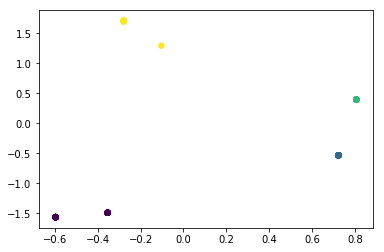

In [58]:
import numpy as np
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA

x = df_dum_size.reset_index().values

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(x)
df_dum_size['clusters'] = clusters



pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_dum_size.ix[:,3:20])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=clusters, s=30)
plt.show()

4
Estimated number of clusters: 4
Silhouette Coefficient: 0.968


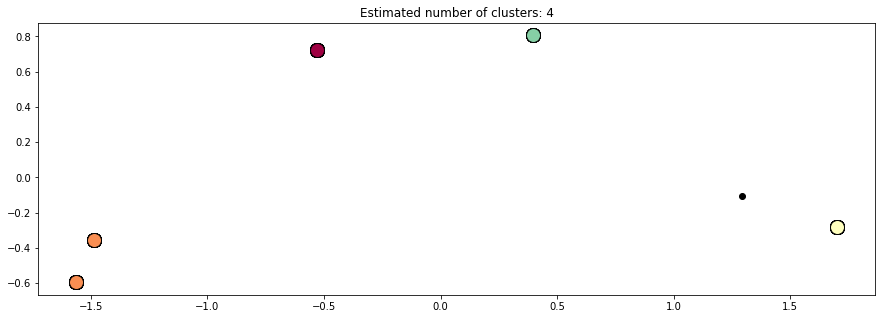

In [61]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(new_df[['hour', 'minute']].values)

pca = PCA(2)

# Turn the dummified df into two columns with PCA
X = pca.fit_transform(df_dum_size.ix[:,3:20])



db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Salary

In [62]:
df_dum_salary = pd.get_dummies(df2, columns=['salary'])
df_dum_salary.head()

,id,sex,size,"salary_10,000-19,999","salary_30,000-39,999","salary_50,000 ขึ้นไป","salary_น้อยกว่า 10,000"
0,1,male,fit,0,0,0,1
1,2,female,thin,0,0,0,1
2,3,female,fat,0,0,0,1
3,4,male,chubby,0,0,0,1
4,5,female,fat,0,0,0,1


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 41, cost: 372.0
Run 1, iteration: 2/100, moves: 9, cost: 372.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 371.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 42, cost: 350.0
Run 3, iteration: 2/100, moves: 1, cost: 350.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 371.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 11, cost: 335.0
Run 5, iteration: 2/100, moves: 0, cost: 335.0
Best run was number 5


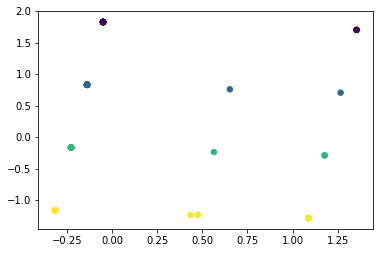

In [78]:
import numpy as np
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA

x = df_dum_salary.reset_index().values

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(x)
df_dum_salary['clusters'] = clusters



pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_dum_salary.ix[:,3:20])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=clusters, s=30)
plt.show()

5
Estimated number of clusters: 5
Silhouette Coefficient: 0.906


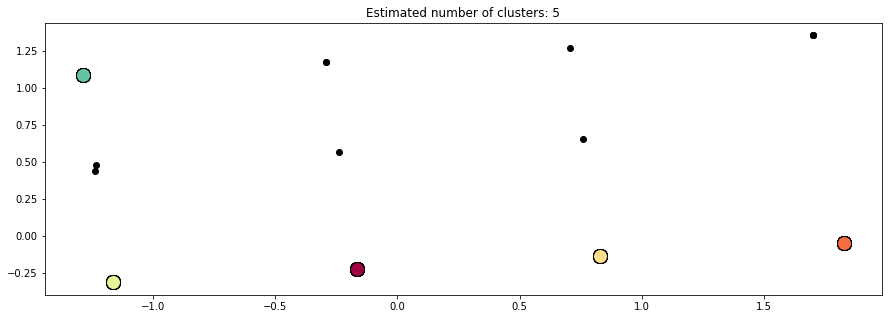

In [82]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(new_df[['hour', 'minute']].values)

pca = PCA(2)

# Turn the dummified df into two columns with PCA
X = pca.fit_transform(df_dum_salary.ix[:,3:20])



db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Meal

In [84]:
df.head()

,id,age,birthdate,sex,salary,size,breakfast,lunch,dinner,late,...,shabu,grill,steak,fastfood,cake,dessert,coffee,juice,created_at,user_id
0,1,21,1996-07-19,male,"น้อยกว่า 10,000",fit,f,t,t,f,...,f,f,t,t,t,t,f,t,2018-02-12 10:15:15.007524+00,4
1,2,20,1998-02-13,female,"น้อยกว่า 10,000",thin,f,t,t,t,...,f,f,f,t,t,f,f,f,2018-02-18 04:35:55.301258+00,23
2,3,22,1995-10-15,female,"น้อยกว่า 10,000",fat,f,t,t,f,...,f,f,t,t,f,t,f,t,2018-02-19 10:21:34.195126+00,29
3,4,19,1999-02-09,male,"น้อยกว่า 10,000",chubby,t,t,t,f,...,f,f,f,f,f,t,t,t,2018-02-19 11:03:40.193844+00,30
4,5,18,1999-05-05,female,"น้อยกว่า 10,000",fat,t,t,t,t,...,f,f,t,t,t,t,f,t,2018-02-19 11:11:51.049498+00,31


In [6]:
# df2=df.drop(['birthdate','age'
#             ,'breakfast','lunch','dinner','late','taste','price','service','clean',
#             'at','location','facebook','twitter','instagram','line','japanese','thai','diet','shabu','grill',
#             'steak','fastfood','cake','dessert','coffee','juice','created_at','user_id'],1)

df_meal=df.drop(['id','birthdate','created_at',],1)
sex = {'male':0,'female':1}
size={'thin':0,'fit':1,'chubby':2,'fat':3}
salary={'น้อยกว่า 10,000':0,'10,000-19,999':1,'20,000-29,999':2,'30,000-39,999':3,'40,000-49,999':4,'50,000 ขึ้นไป':5}
breakfast = {'f':0,'t':1}
lunch = {'f':0,'t':1}
dinner = {'f':0,'t':1}
late = {'f':0,'t':1}
taste = {'f':0,'t':1}
price = {'f':0,'t':1}
service = {'f':0,'t':1}
clean = {'f':0,'t':1}
at = {'f':0,'t':1}
location = {'f':0,'t':1}
facebook = {'f':0,'t':1}
twitter = {'f':0,'t':1}
instagram = {'f':0,'t':1}
line = {'f':0,'t':1}
japanese = {'f':0,'t':1}
thai = {'f':0,'t':1}
diet = {'f':0,'t':1}
shabu = {'f':0,'t':1}
grill = {'f':0,'t':1}
steak = {'f':0,'t':1}
fastfood = {'f':0,'t':1}
cake = {'f':0,'t':1}
dessert = {'f':0,'t':1}
coffee = {'f':0,'t':1}
juice = {'f':0,'t':1}

for k,i in df_meal.iterrows():
    if i['sex']==i['sex']:
        df_meal.loc[k,"sexc"]=sex[i['sex']]
    if i['size']==i['size']:
        df_meal.loc[k,"sizec"]=size[i['size']]
    if i['salary']==i['salary']:
        df_meal.loc[k,"salaryc"]=salary[i['salary']]
    if i['breakfast']==i['breakfast']:
        df_meal.loc[k,"breakfastc"]=breakfast[i['breakfast']]
    if i['lunch']==i['lunch']:
        df_meal.loc[k,"lunchc"]=lunch[i['lunch']]
    if i['dinner']==i['dinner']:
        df_meal.loc[k,"dinnerc"]=breakfast[i['dinner']]
    if i['late']==i['late']:
        df_meal.loc[k,"latec"]=late[i['late']]
    if i['taste']==i['taste']:
        df_meal.loc[k,"tastec"]=taste[i['taste']]
    if i['price']==i['price']:
        df_meal.loc[k,"pricec"]=price[i['price']]
    if i['service']==i['service']:
        df_meal.loc[k,"servicec"]=service[i['service']]
    if i['clean']==i['clean']:
        df_meal.loc[k,"cleanc"]=clean[i['clean']]
    if i['at']==i['at']:
        df_meal.loc[k,"atc"]=at[i['at']]
    if i['location']==i['location']:
        df_meal.loc[k,"locationc"]=location[i['location']]
    if i['facebook']==i['facebook']:
        df_meal.loc[k,"facebookc"]=facebook[i['facebook']]
    if i['twitter']==i['twitter']:
        df_meal.loc[k,"twitterc"]=twitter[i['twitter']]
    if i['instagram']==i['instagram']:
        df_meal.loc[k,"instagramc"]=instagram[i['instagram']]
    if i['line']==i['line']:
        df_meal.loc[k,"linec"]=line[i['line']]
    if i['japanese']==i['japanese']:
        df_meal.loc[k,"japanesec"]=japanese[i['japanese']]
    if i['thai']==i['thai']:
        df_meal.loc[k,"thaic"]=thai[i['thai']]
    if i['diet']==i['diet']:
        df_meal.loc[k,"dietc"]=diet[i['diet']]
    if i['shabu']==i['shabu']:
        df_meal.loc[k,"shabuc"]=shabu[i['shabu']]
    if i['grill']==i['grill']:
        df_meal.loc[k,"grillc"]=grill[i['grill']]
    if i['steak']==i['steak']:
        df_meal.loc[k,"steakc"]=steak[i['steak']]
    if i['fastfood']==i['fastfood']:
        df_meal.loc[k,"fastfoodc"]=fastfood[i['fastfood']]
    if i['cake']==i['cake']:
        df_meal.loc[k,"cakec"]=grill[i['cake']]
    if i['dessert']==i['dessert']:
        df_meal.loc[k,"dessertc"]=dessert[i['dessert']]
    if i['coffee']==i['coffee']:
        df_meal.loc[k,"coffeec"]=coffee[i['coffee']]
    if i['juice']==i['juice']:
        df_meal.loc[k,"juicec"]=juice[i['juice']]

In [32]:
new_df = df_meal.drop(['breakfast','lunch','dinner','late','taste','price','service','clean','at','location',
                           'facebook','twitter','instagram','line','japanese','thai','diet','shabu','grill','steak',
                            'dessert','coffee','juice','user_id','fastfood','cake','sex','salary','size','age'],1)
new_df.head()


,sexc,sizec,salaryc,breakfastc,lunchc,dinnerc,latec,tastec,pricec,servicec,...,thaic,dietc,shabuc,grillc,steakc,fastfoodc,cakec,dessertc,coffeec,juicec
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


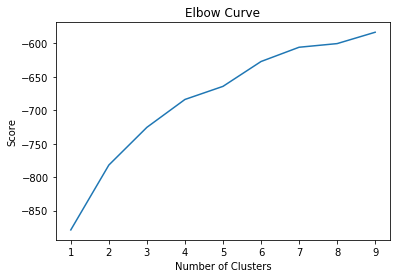

In [113]:
Nc = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(new_df.ix[:,0:28]).score(new_df.ix[:,0:28]) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

# PCA

In [106]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(new_df.ix[:,0:28])

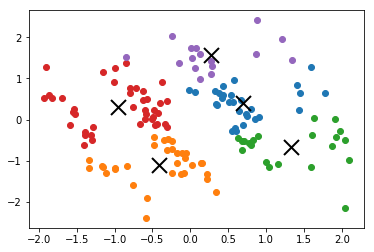

In [114]:
def kmeansshow(k,X):

    from sklearn import cluster
    from matplotlib import pyplot
    import numpy as np

    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)

    labels = kmeans.labels_
    new_df["clusters"] = kmeans.labels_
    centroids = kmeans.cluster_centers_
    #print centroids


    for i in range(k):
        # select only data observations with cluster label == i
        ds = X[np.where(labels==i)]
        # plot the data observations
#         plt.scatter(ds[:,0],ds[:,1], c=df7["clusters"], s=20)
        pyplot.plot(ds[:,0],ds[:,1],'o')
        # plot the centroids
        lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
        # make the centroid x's bigger
        pyplot.setp(lines,ms=15.0)
        pyplot.setp(lines,mew=2.0)
    pyplot.show()
    return labels


# pca = PCA(2)

# Turn the dummified df into two columns with PCA
# plot_columns = pca.fit_transform(df7.ix[:,1:19])

# Plot based on the two dimensions, and shade by cluster label
# plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df6["clusters"], s=30)
# plt.show()


label = kmeansshow(5,pca_transformed)

In [115]:
from sklearn.metrics import accuracy_score,homogeneity_score,completeness_score,v_measure_score,silhouette_score,adjusted_rand_score,adjusted_mutual_info_score #works

labels_true = label
titles = ['PCA', 'Linear AE', 'Sigmoid AE', 'Relu AE']
for n_clusters_ in [4,5]:
  estimators = [('PCA'    , KMeans(n_clusters=n_clusters_), pca_transformed),]
#                 ('AE linear' , KMeans(n_clusters=n_clusters_), encoded_data),
#                 ('AE sigmoid' , KMeans(n_clusters=n_clusters_), encoded_data2),
#                 ('AE relu', KMeans(n_clusters=n_clusters_), encoded_data3)]

#   print(type(y))
  print('Number of clusters: %d' % n_clusters_)
  for name, est, data in estimators:
      X = data
      est.fit(X)
      labels = est.labels_
#       print(labels[:])
      print(name,':')
#       print(labels[:]) 
      print("Homogeneity: %0.3f" %homogeneity_score(labels_true, labels))
      print("Completeness: %0.3f" % completeness_score(labels_true, labels))
      print("V-measure: %0.3f" % v_measure_score(labels_true, labels))
      print("Adjusted Rand Index: %0.3f"
            % adjusted_rand_score(labels_true, labels))
      print("Adjusted Mutual Information: %0.3f"
            % adjusted_mutual_info_score(labels_true, labels))
      print("Silhouette Coefficient: %0.3f"
            %silhouette_score(X, labels))
      print()
  print()
  print('----------------------------------------------------------------------------------')
  print()

Number of clusters: 4
PCA :
Homogeneity: 0.754
Completeness: 0.852
V-measure: 0.800
Adjusted Rand Index: 0.752
Adjusted Mutual Information: 0.747
Silhouette Coefficient: 0.394


----------------------------------------------------------------------------------

Number of clusters: 5
PCA :
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.377


----------------------------------------------------------------------------------



In [76]:
from sklearn.preprocessing import MinMaxScaler
# iris = datasets.load_iris()
# X = df7.ix[:,:]
y = new_df['clusters']
target_names = ['0','1','2','3','4','5']
X = new_df.ix[:,0:28]
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [77]:
def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple','yellow']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1, 2,3,4,5], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=1., lw=lw,label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)  
    plt.xlabel(vtitle + "1")
    plt.ylabel(vtitle + "2")
    plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 58        
_________________________________________________________________
dense_8 (Dense)              (None, 28)                84        
Total params: 142
Trainable params: 142
Non-trainable params: 0
_________________________________________________________________
None


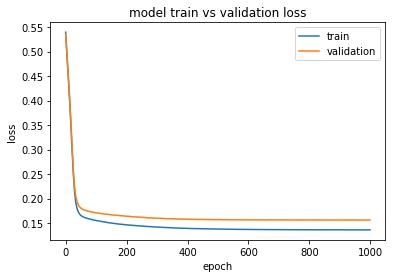

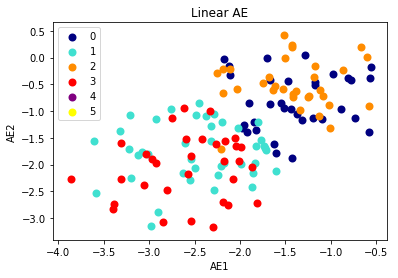

In [78]:
from keras.layers import Input, Dense
from keras.models import Model
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim = X_scaled.shape[1]
encoding_dim = 2  
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear')(input_img)
decoded = Dense(input_dim, activation='linear')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

history = autoencoder.fit(X_scaled, X_scaled,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(X_scaled)

plot3clusters(encoded_data[:,:2], 'Linear AE', 'AE')  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 28)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 58        
_________________________________________________________________
dense_10 (Dense)             (None, 28)                84        
Total params: 142
Trainable params: 142
Non-trainable params: 0
_________________________________________________________________
None


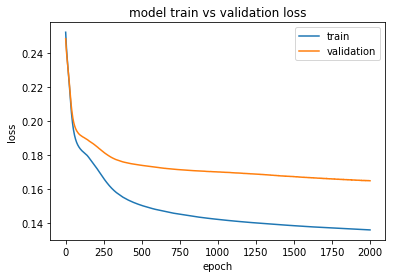

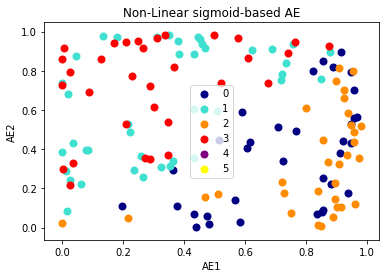

In [79]:
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim2 = X_scaled.shape[1]
encoding_dim2 = 2  
input_img2 = Input(shape=(input_dim2,))
encoded2 = Dense(encoding_dim2, activation='sigmoid')(input_img2)
decoded2 = Dense(input_dim2, activation='sigmoid')(encoded2)
autoencoder2 = Model(input_img2, decoded2)
autoencoder2.compile(optimizer='adam', loss='mse')
print(autoencoder2.summary())

history2 = autoencoder2.fit(X_scaled, X_scaled,
                epochs=2000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder2 = Model(input_img2, encoded2)
encoded_input2 = Input(shape=(encoding_dim2,))
decoder_layer2 = autoencoder2.layers[-1]
decoder2 = Model(encoded_input2, decoder_layer2(encoded_input2))
encoded_data2 = encoder2.predict(X_scaled)

plot3clusters(encoded_data2[:,:2], 'Non-Linear sigmoid-based AE', 'AE')  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 28)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 58        
_________________________________________________________________
dense_12 (Dense)             (None, 28)                84        
Total params: 142
Trainable params: 142
Non-trainable params: 0
_________________________________________________________________
None


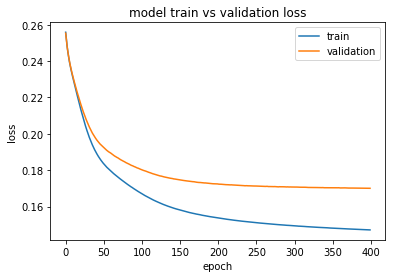

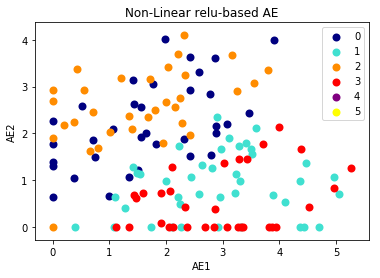

In [80]:
from keras import regularizers
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim3 = X_scaled.shape[1]
encoding_dim3 = 2  
input_img3 = Input(shape=(input_dim3,))
encoded3 = Dense(encoding_dim3, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img3)
decoded3 = Dense(input_dim3, activation='sigmoid')(encoded3)
autoencoder3 = Model(input_img3, decoded3)
autoencoder3.compile(optimizer='adam', loss='mse')
print(autoencoder3.summary())

history3 = autoencoder3.fit(X_scaled, X_scaled,
                epochs=400,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder3 = Model(input_img3, encoded3)
encoded_input3 = Input(shape=(encoding_dim3,))
decoder_layer3 = autoencoder3.layers[-1]
decoder3 = Model(encoded_input3, decoder_layer3(encoded_input3))
encoded_data3 = encoder3.predict(X_scaled)

plot3clusters(encoded_data3[:,:2], 'Non-Linear relu-based AE', 'AE')  

In [81]:
from sklearn.metrics import accuracy_score,homogeneity_score,completeness_score,v_measure_score,silhouette_score,adjusted_rand_score,adjusted_mutual_info_score #works

labels_true = y 
titles = ['PCA', 'Linear AE', 'Sigmoid AE', 'Relu AE']
for n_clusters_ in [4,5]:
  estimators = [('PCA'    , KMeans(n_clusters=n_clusters_), pca_transformed),
                ('AE linear' , KMeans(n_clusters=n_clusters_), encoded_data),
                ('AE sigmoid' , KMeans(n_clusters=n_clusters_), encoded_data2),
                ('AE relu', KMeans(n_clusters=n_clusters_), encoded_data3)]

  print(type(y))
  print('Number of clusters: %d' % n_clusters_)
  for name, est, data in estimators:
      X = data
      est.fit(X)
      labels = est.labels_
#       print(labels[:])
      print(name,':')
#       print(labels[:]) 
      print("Homogeneity: %0.3f" %homogeneity_score(labels_true, labels))
      print("Completeness: %0.3f" % completeness_score(labels_true, labels))
      print("V-measure: %0.3f" % v_measure_score(labels_true, labels))
      print("Adjusted Rand Index: %0.3f"
            % adjusted_rand_score(labels_true, labels))
      print("Adjusted Mutual Information: %0.3f"
            % adjusted_mutual_info_score(labels_true, labels))
      print("Silhouette Coefficient: %0.3f"
            %silhouette_score(X, labels))
      print()
  print()
  print('----------------------------------------------------------------------------------')
  print()

<class 'pandas.core.series.Series'>
Number of clusters: 4
PCA :
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.394

AE linear :
Homogeneity: 0.400
Completeness: 0.412
V-measure: 0.406
Adjusted Rand Index: 0.257
Adjusted Mutual Information: 0.385
Silhouette Coefficient: 0.356

AE sigmoid :
Homogeneity: 0.261
Completeness: 0.260
V-measure: 0.261
Adjusted Rand Index: 0.156
Adjusted Mutual Information: 0.242
Silhouette Coefficient: 0.460

AE relu :
Homogeneity: 0.347
Completeness: 0.348
V-measure: 0.348
Adjusted Rand Index: 0.228
Adjusted Mutual Information: 0.331
Silhouette Coefficient: 0.366


----------------------------------------------------------------------------------

<class 'pandas.core.series.Series'>
Number of clusters: 5
PCA :
Homogeneity: 0.870
Completeness: 0.764
V-measure: 0.814
Adjusted Rand Index: 0.763
Adjusted Mutual Information: 0.757
Silhouette Coefficient: 0.371

AE line

In [116]:
d = new_df.sort_values(by=['clusters'])
d.to_csv('profile_clustering_KMeans.csv', encoding='utf-8', index=False)

4
Estimated number of clusters: 4
Silhouette Coefficient: -0.085


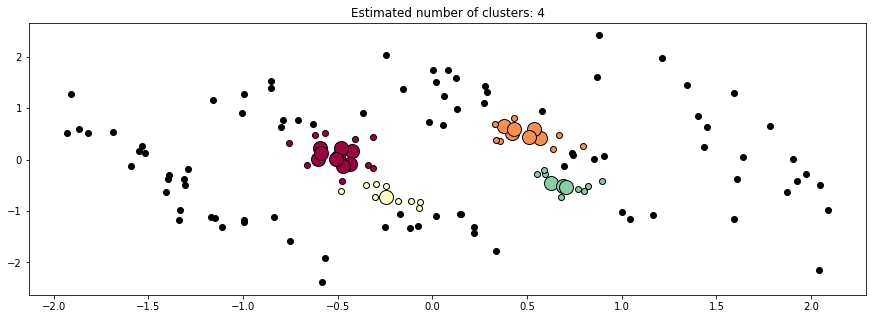

In [104]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(new_df[['hour', 'minute']].values)

pca = PCA(2)

# # Turn the dummified df into two columns with PCA
X = pca.fit_transform(new_df.ix[:,0:28])



db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_
new_df['clusters'] = labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 1183.0
Run 1, iteration: 2/100, moves: 12, cost: 1168.0
Run 1, iteration: 3/100, moves: 9, cost: 1167.0
Run 1, iteration: 4/100, moves: 0, cost: 1167.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 36, cost: 1217.0
Run 2, iteration: 2/100, moves: 24, cost: 1199.0
Run 2, iteration: 3/100, moves: 29, cost: 1174.0
Run 2, iteration: 4/100, moves: 14, cost: 1161.0
Run 2, iteration: 5/100, moves: 0, cost: 1161.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 45, cost: 1175.0
Run 3, iteration: 2/100, moves: 6, cost: 1174.0
Run 3, iteration: 3/100, moves: 0, cost: 1174.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 46, cost: 1180.0
Run 4, iteration: 2/100, moves: 10, cost: 1175.0

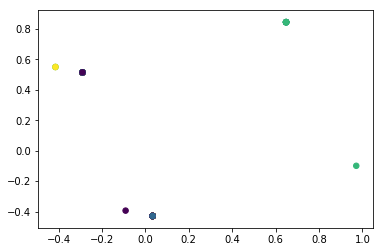

In [98]:
import numpy as np
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA

x = df_mealDrop.reset_index().values

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(x)
# df_mealDrop['clusters'] = clusters



pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_mealDrop.ix[:,5:8])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=clusters, s=30)
plt.show()

3
Estimated number of clusters: 3
Silhouette Coefficient: 0.985


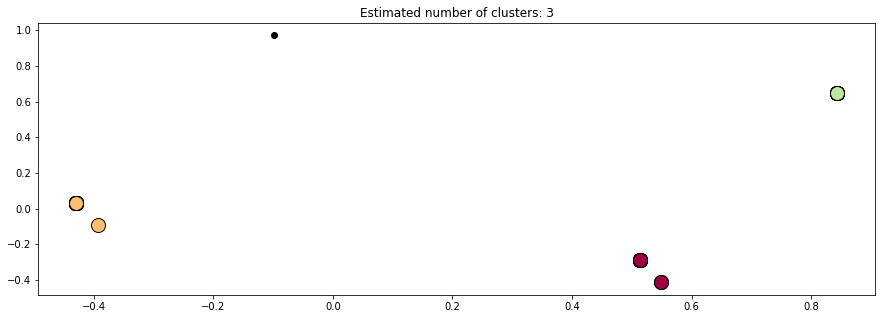

In [99]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(new_df[['hour', 'minute']].values)

pca = PCA(2)

# Turn the dummified df into two columns with PCA
X = pca.fit_transform(df_mealDrop.ix[:,5:8])



db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

2
Estimated number of clusters: 2
Silhouette Coefficient: 0.116


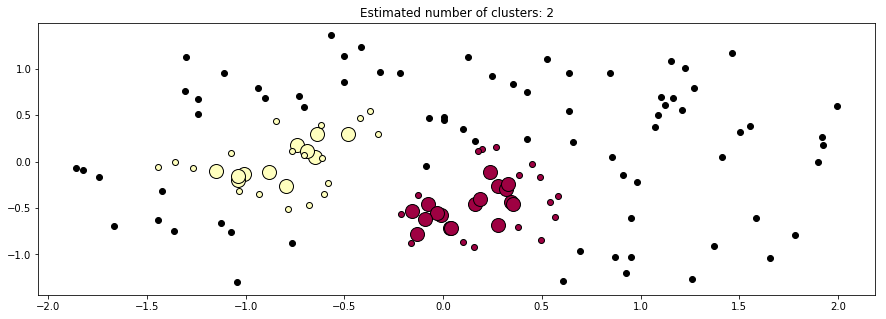

In [104]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(new_df[['hour', 'minute']].values)

pca = PCA(2)

# Turn the dummified df into two columns with PCA
X = pca.fit_transform(df_mealDrop.ix[:,5:])



db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [105]:
df_mealDrop.head()


,age,size,sexc,sizec,salaryc,breakfastc,lunchc,dinnerc,latec,tastec,...,thaic,dietc,shabuc,grillc,steakc,fastfoodc,cakec,dessertc,coffeec,juicec
0,21,fit,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,20,thin,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,22,fat,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,19,chubby,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,18,fat,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


# Satisfaction


In [111]:
# dfSatisfaction = df_meal.drop(['breakfast','lunch','dinner','late','taste','price','service','clean','at','location',
#                            'facebook','twitter','instagram','line','japanese','thai','diet','shabu','grill','steak',
#                             'dessert','coffee','juice','user_id','fastfood','cake','sex','salary','age','size','salaryc',
#                            'breakfastc','lunchc','dinnerc'],1)

df_profile = df_meal.drop(['breakfast','lunch','dinner','late','taste','price','service','clean','at','location',
                           'facebook','twitter','instagram','line','japanese','thai','diet','shabu','grill','steak',
                            'dessert','coffee','juice','user_id','fastfood','cake','sex','salary','age','size',],1)
df_profile.head()


,sexc,sizec,salaryc,breakfastc,lunchc,dinnerc,latec,tastec,pricec,servicec,...,thaic,dietc,shabuc,grillc,steakc,fastfoodc,cakec,dessertc,coffeec,juicec
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


2
Estimated number of clusters: 2
Silhouette Coefficient: 0.069


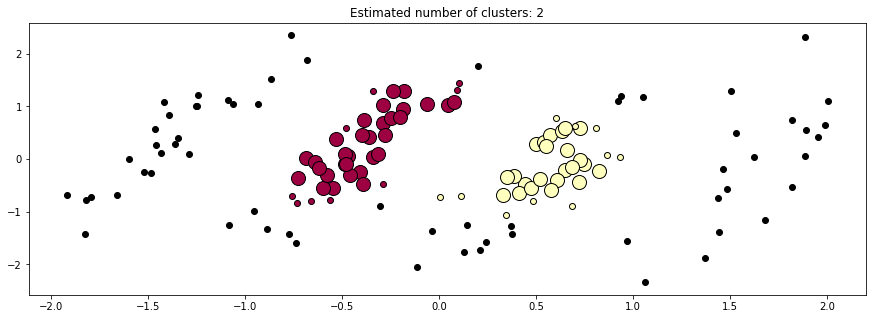

In [118]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(new_df[['hour', 'minute']].values)

pca = PCA(2)

# Turn the dummified df into two columns with PCA
X = pca.fit_transform(df_profile.ix[:,0:])



db = DBSCAN(eps=0.4, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19, cost: 1109.0
Run 1, iteration: 2/100, moves: 5, cost: 1107.0
Run 1, iteration: 3/100, moves: 4, cost: 1107.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 38, cost: 1147.0
Run 2, iteration: 2/100, moves: 27, cost: 1117.0
Run 2, iteration: 3/100, moves: 6, cost: 1117.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 39, cost: 1107.0
Run 3, iteration: 2/100, moves: 4, cost: 1107.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 33, cost: 1119.0
Run 4, iteration: 2/100, moves: 10, cost: 1107.0
Run 4, iteration: 3/100, moves: 4, cost: 1107.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 31, cost: 1108.0
Run 5, iteration:

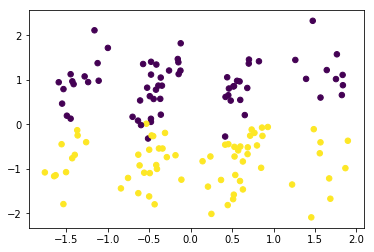

In [125]:
import numpy as np
from kmodes.kmodes import KModes
from sklearn.decomposition import PCA

x = df_profile.reset_index().values

km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(x)
df_profile['clusters'] = clusters



pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_profile.ix[:,0:])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=clusters, s=30)
plt.show()

In [129]:
from sklearn.preprocessing import StandardScaler
# data = df_profile.drop(['sizec'], axis=1)
X= StandardScaler().fit_transform(df_profile['sizec'].values.reshape(-1, 1))
RANDOM_SEED = 42

# X

In [131]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
X_train, X_test = train_test_split(df_profile, test_size=0.2, random_state=RANDOM_SEED)
# X_train = X_train[X_train.Class == 0]
# X_train = X_train.drop(['Class'], axis=1)
# y_test = X_test['Class']
# X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

ModuleNotFoundError: No module named 'tensorflow'